### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
import warnings
warnings.filterwarnings('ignore')
from PIL import Image 

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
Data = pd.read_csv('Data.csv')
Data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
item = pd.read_csv('item.csv')
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
user = pd.read_csv('user.csv')
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [6]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
Data.shape

(100000, 4)

In [8]:
Data.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(Data)

,Total,Percent
timestamp,0,0.0
rating,0,0.0
movie id,0,0.0
user id,0,0.0


In [10]:
Data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [11]:
pd.DataFrame( Data.isnull().sum(), columns= ['Number of missing values in Data'])

,Number of missing values in Data
user id,0
movie id,0
rating,0
timestamp,0


In [12]:
Data.isnull().values.any()

False

In [13]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [14]:
item.shape

(1681, 22)

In [15]:
item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(item)

,Total,Percent
Western,0,0.0
War,0,0.0
movie title,0,0.0
release date,0,0.0
unknown,0,0.0
Action,0,0.0
Adventure,0,0.0
Animation,0,0.0
Childrens,0,0.0
Comedy,0,0.0


In [17]:
pd.DataFrame( item.isnull().sum(), columns= ['Number of missing values in item'])

,Number of missing values in item
movie id,0
movie title,0
release date,0
unknown,0
Action,0
Adventure,0
Animation,0
Childrens,0
Comedy,0
Crime,0


In [18]:
item.isnull().values.any()

False

In [19]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [20]:
user.shape

(943, 5)

In [21]:
user.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [22]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(user)

,Total,Percent
zip code,0,0.0
occupation,0,0.0
gender,0,0.0
age,0,0.0
user id,0,0.0


In [23]:
#pd.DataFrame( user.isnull().sum(), columns= ['Number of missing values in user'])

In [24]:
user.isnull().values.any()

False

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [25]:
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [26]:
print("\nNumber of Movies per Genre: ", np.sum(item, axis = 0))


Number of Movies per Genre:  movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                        

#### 5. Find the movies that have more than one genre - 5 marks

In [27]:
# use sum on the default axis. hint: default axis=1
# Default axis is 0 or columns. Axis=1 are the rows
item_df = pd.DataFrame(item)
item_df.drop(columns=['movie id', 'release date'],inplace=True)
item_df.set_index('movie title', inplace=True)
item_df['sum'] = np.sum(item_df, axis = 1) 
item_df = item_df[item_df['sum']>1] 
item_df


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum
movie title,,,,,,,,,,,,,,,,,,,,
Toy Story,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
GoldenEye,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
Get Shorty,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
Copycat,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
Twelve Monkeys,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MURDER and murder,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,3
Tainted,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2
Mirage,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2


In [28]:
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [29]:
# Making a copy of item
item2 = item.copy()
item_df = pd.DataFrame(item2)
item_df.drop(columns=['movie id', 'release date'],inplace=True)
item_df.set_index('movie title', inplace=True)
item_df['sum'] = np.sum(item_df, axis = 1) 
item_df = item_df[item_df['unknown']!=1]
#item_df
item_df.to_csv('C:/Users/jhardin/Documents/JTH/AIML/EDA/Practice/item2.csv')

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

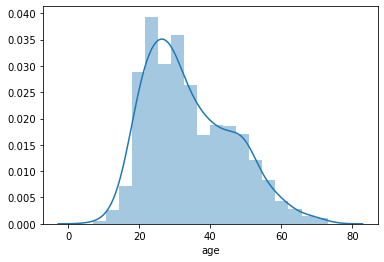

In [41]:
#your answers here
# distplot on age of user
age_user=user['age'].dropna()
sns.distplot(age_user)         
plt.show()

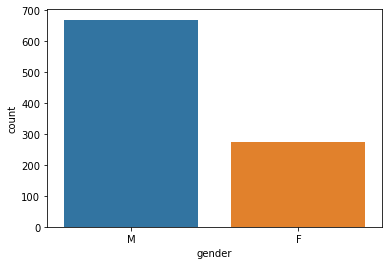

In [56]:
#gender_user = user['gender'].dropna()
sns.countplot(x="gender", data=user)
plt.show()

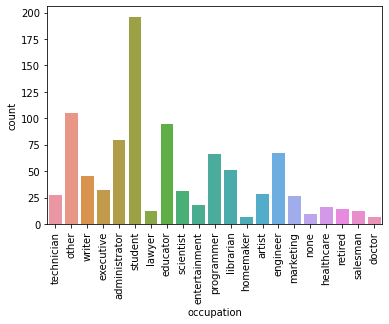

In [53]:
#occ_user = user['occupation'].dropna()
#xticklabels = ['occupation']
#plt.figure(figsize=(18,16))
#user.set_xticklabels(user.get_xticklabels(), rotation=90);
user_occ = sns.countplot(x="occupation", data=user)
user_occ.set_xticklabels(user_occ.get_xticklabels(), rotation=90);
plt.show()

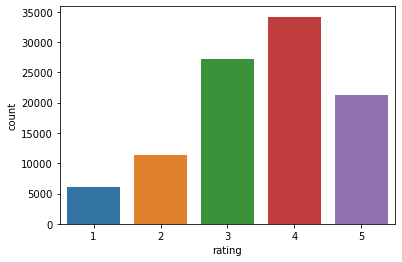

In [51]:
#rating_Data = Data['rating'].dropna()
sns.countplot(x="rating", data=Data)
plt.show()

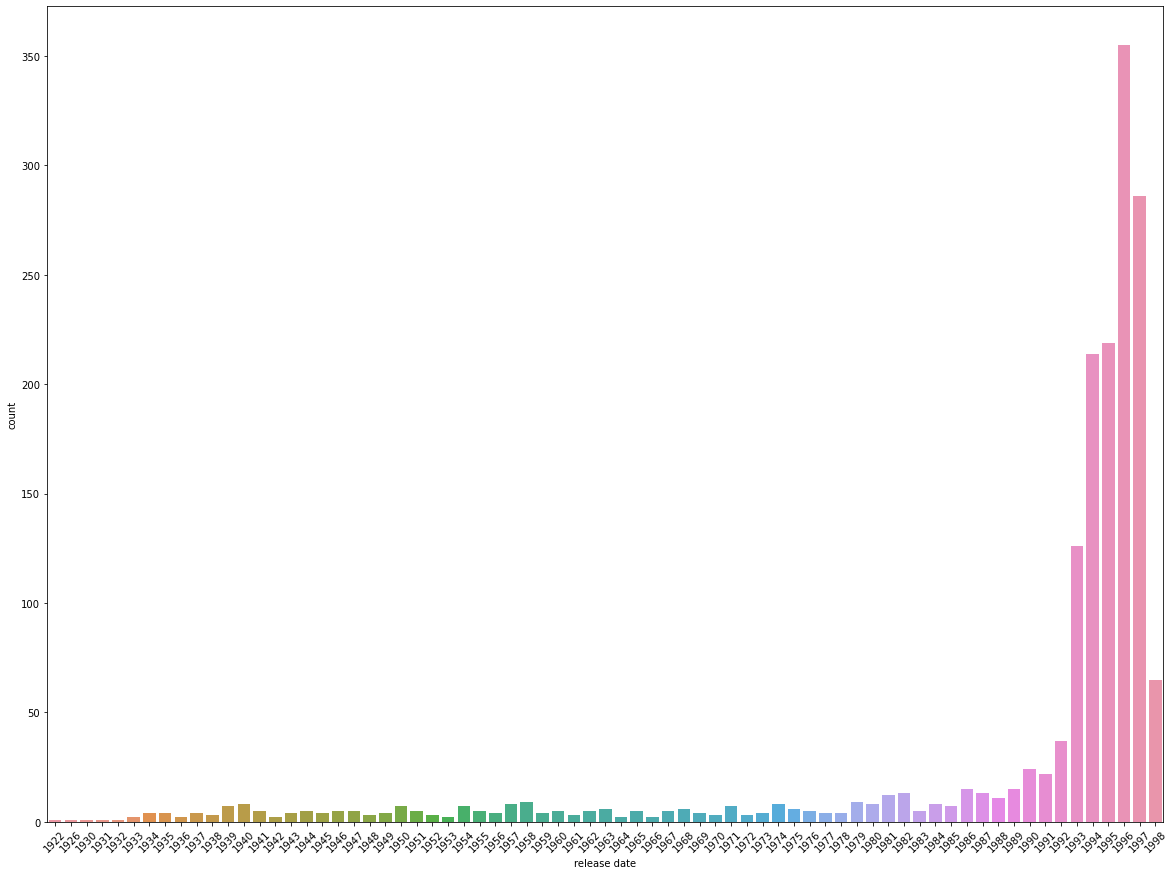

In [30]:
#year_item = item['release date'].dropna()
item = pd.read_csv('item.csv')
year_item = item['release date'].dropna()
year_item_df = pd.DataFrame(year_item)
#year_item_df.columns
year_drop_mm_dd = year_item_df['release date'].str.split('-').str[2]
year_item_year_df = pd.DataFrame(year_drop_mm_dd)
plt.figure(figsize=(20,15))
relyr = sns.countplot(x="release date", data=year_item_year_df)
relyr.set_xticklabels(relyr.get_xticklabels(), rotation=45);
plt.show()


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 


Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

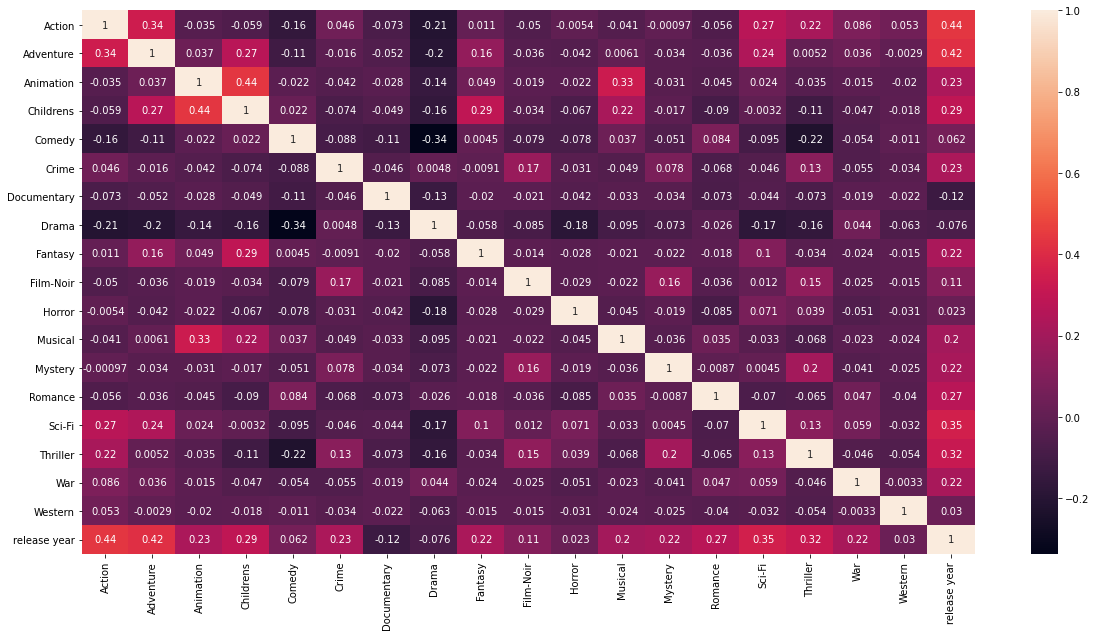

In [69]:
item8 = pd.read_csv('item.csv')
#drops unwanted columns
item8.drop(columns=['movie id', 'movie title', 'unknown'],inplace=True)
item8.dropna(inplace=True)
#split release date into mm dd yyyy
item9 = item8["release date"].str.split("-", n = 2, expand = True) 
#place the year at the end using the last column in item9
item8["release year"]= item9[2]
#drop the release data column like its hot, drop it like its hot, drop it like its hot
item8.drop(columns=['release date'],inplace=True)
#make the release year the index
item8.set_index('release year', inplace=True)
# groupby is working
item8.groupby('release year')
# sum the number of genre per row
item8['release year'] = np.sum(item8, axis = 1)
# visualize
plt.figure(figsize=(20,10))
sns.heatmap(item8.corr(), annot=True)
plt.show()
######### Try stackplot if there is time
#plt.figure(figsize=(20,15))
#item9 = sns.stackplot(item8)
#item9.set_xticklabels(rel_yr.get_xticklabels(), rotation=90);
#plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [160]:
# read the files
data1 = pd.read_csv('data.csv')
item1 = pd.read_csv('item.csv')
# merge the data frames
df_merged = pd.merge(data1, item1, left_on=['movie id'],
              right_on=['movie id'],
              how='right')
# drop columns 
df_merged.drop(columns=['user id','timestamp','release date', 'unknown'],inplace=True)
# grouby and count
rating_count = df_merged.groupby("movie id")["rating"].count()
# make it a data frame
df_rating_count = pd.DataFrame(rating_count)
# rename columns
df_rating_count.rename(columns={'rating':'rating count'},inplace=True)
# merge the 2 date frames
df_merged2 = pd.merge(df_rating_count, df_merged, left_on=['movie id'],
              right_on=['movie id'],
              how='right')
# only keep the columns needed
df_merged3 = df_merged2[['movie id'] + ['movie title'] + ['rating count'] + ['rating']]
# drop the movies with rating counts above 100
df_filter_count = df_merged3[df_merged3['rating count'] < 100] 
# get the sum to be used for average
filter_count_sum = df_filter_count.groupby("movie id")["rating"].sum()
# get the count to be used for average
filter_count = df_filter_count.groupby("movie id")["rating"].count()
df_filter_count_sum = pd.DataFrame(filter_count_sum)
df_filter_count = pd.DataFrame(filter_count)
# merge frames on movie id
df_merged4 = pd.merge(df_filter_count_sum, df_filter_count, left_on=['movie id'],
              right_on=['movie id'],
              how='right')
# calcualte the average
df_merged4['Average Rating'] = df_merged4['rating_x']/df_merged4['rating_y'] 
df_merged5 = pd.merge(df_merged4, df_merged3, left_on=['movie id'],
              right_on=['movie id'],
              how='right')
df_merged5 = df_merged5[df_merged5['Average Rating'] > 0]
df_merged6 = df_merged5[['movie id'] + ['movie title']+ ['Average Rating']]
df_merged7 = df_merged6.drop_duplicates(keep='last')
df_merged8 = df_merged7.sort_values(by=['Average Rating'], ascending=False)
# top 25 Movie Titles by Average Rating
df_merged8.nlargest(25, 'Average Rating')


,movie id,movie title,Average Rating
22456,814,"Great Day in Harlem, A",5.000000
35022,1599,Someone Else's America,5.000000
34580,1467,"Saint of Fort Washington, The",5.000000
31162,1122,They Made Me a Criminal,5.000000
32381,1201,Marlene Dietrich: Shadow and Light (,5.000000
34884,1536,Aiqing wansui,5.000000
35134,1653,Entertaining Angels: The Dorothy Day Story,5.000000
33634,1293,Star Kid,5.000000
32216,1189,Prefontaine,5.000000
34741,1500,Santa with Muscles,5.000000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [71]:
# 1. Men watch more drama than women
# read the files
data10 = pd.read_csv('data.csv')
item10 = pd.read_csv('item.csv')
user10 = pd.read_csv('user.csv')
# drop unwanted columns
user10.drop(columns=['age', 'occupation', 'zip code'],inplace=True)
item10.drop(columns=['movie title', 'release date', 'unknown'],inplace=True)
data10.drop(columns=['rating', 'timestamp'],inplace=True)
# merge the data frames
df_merge_u_d = pd.merge(user10, data10, left_on=['user id'],
              right_on=['user id'],
              how='left')
df_merge_u_d_i = pd.merge(df_merge_u_d, item10, left_on=['movie id'],
              right_on=['movie id'],
              how='left')
df_merged_10 = df_merge_u_d_i[['gender'] + ['Drama']]
df_merged_10 = df_merged_10.groupby("gender")["Drama"].sum()
df_drama = pd.DataFrame(df_merged_10)
df_drama

,Drama
gender,
F,11008.0
M,28887.0


In [72]:
# 2. Women watch more Sci-Fi than men
df_merged_11 = df_merge_u_d_i[['gender'] + ['Sci-Fi']]
df_merged_11 = df_merged_11.groupby("gender")["Sci-Fi"].sum()
df_sci_fi = pd.DataFrame(df_merged_11)
df_sci_fi

,Sci-Fi
gender,
F,2629.0
M,10101.0


In [76]:
# 3. Men watch more Romance than women
df_merged_12 = df_merge_u_d_i[['gender'] + ['Romance']]
df_merged_12 = df_merged_12.groupby("gender")["Romance"].sum()
df_romance = pd.DataFrame(df_merged_12)
df_romance

,Romance
gender,
F,5858.0
M,13603.0


In [83]:
df_merge_genre_ds = pd.merge(df_drama, df_sci_fi, left_on=['gender'],
              right_on=['gender'],
              how='left')
#df_merge_genre_ds
df_merge_genre_dsr = pd.merge(df_merge_genre_ds, df_romance, left_on=['gender'],
              right_on=['gender'],
              how='left')
df_merge_genre_dsr

,Drama,Sci-Fi,Romance
gender,,,
F,11008.0,2629.0,5858.0
M,28887.0,10101.0,13603.0


#### Conclusion:



In [1]:
# write the conclusions here
# 1. Men watch more drama than women. Yes, men have watched more Drama than women
# 2. Women watch more Sci-Fi than men. No, men watch more Sci-Fi than women
# 3. Men watch more Romance than women. 


In [86]:
# save to csv
df_merge_genre_dsr.to_csv('output_jth.csv')

In [89]:
#Getting an htl file as output here. Found in EDA - Bivatiate_Analysis_and_Pandas_Profiling
#!pip install pandas_profiling
import numpy as np
import pandas as pd
import pandas_profiling 
import pandas as pdf
df=pd.read_csv('output_jth.csv')
pandas_profiling.ProfileReport(df)

In [90]:
#Getting an html file as output here. Found in EDA - Bivatiate_Analysis_and_Pandas_Profiling
pandas_profiling.ProfileReport(df).to_file("output_jth.html")
# found another way to try this but did not test
#Html_file= open("filename","w")
#Html_file.write(html_str)
#Html_file.close()